# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
bike_df = pd.read_csv('day.csv')

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_df.shape

(730, 16)

Checking if the data has any null values in it

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Data Visualisation

### Visualising Continous Variable

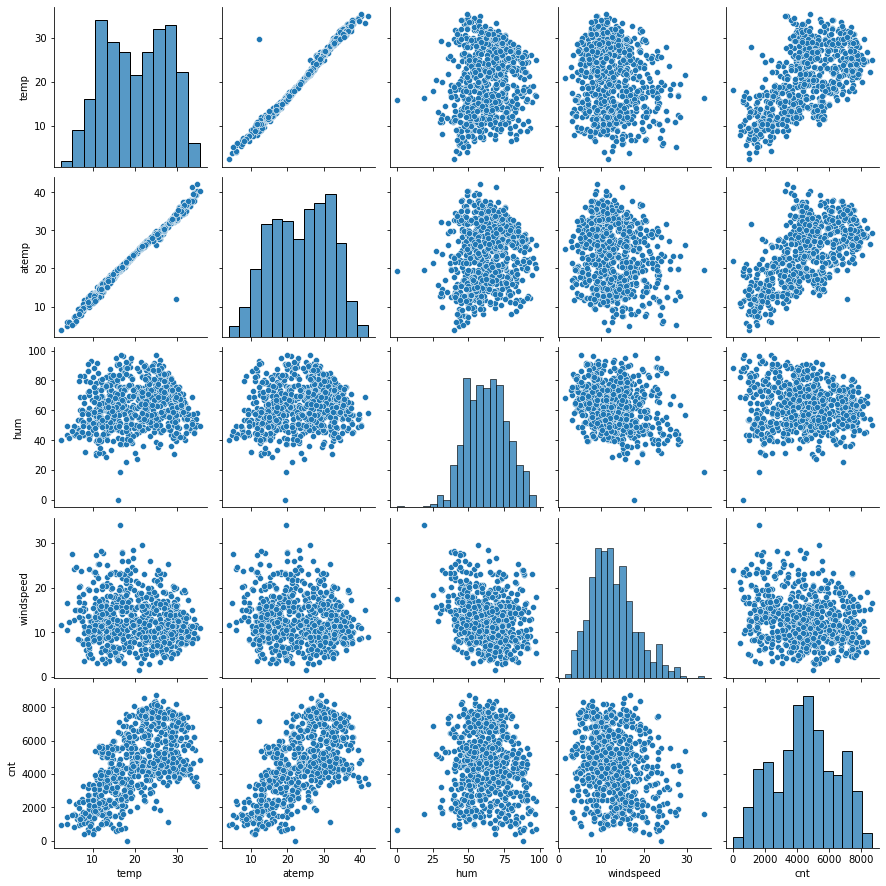

In [9]:
sns.pairplot(data = bike_df, vars = ['temp','atemp','hum','windspeed','cnt'])
# registered and casual columns are added in the cnt column, so not visualising them
plt.show()

### Visualising Categorical Variables

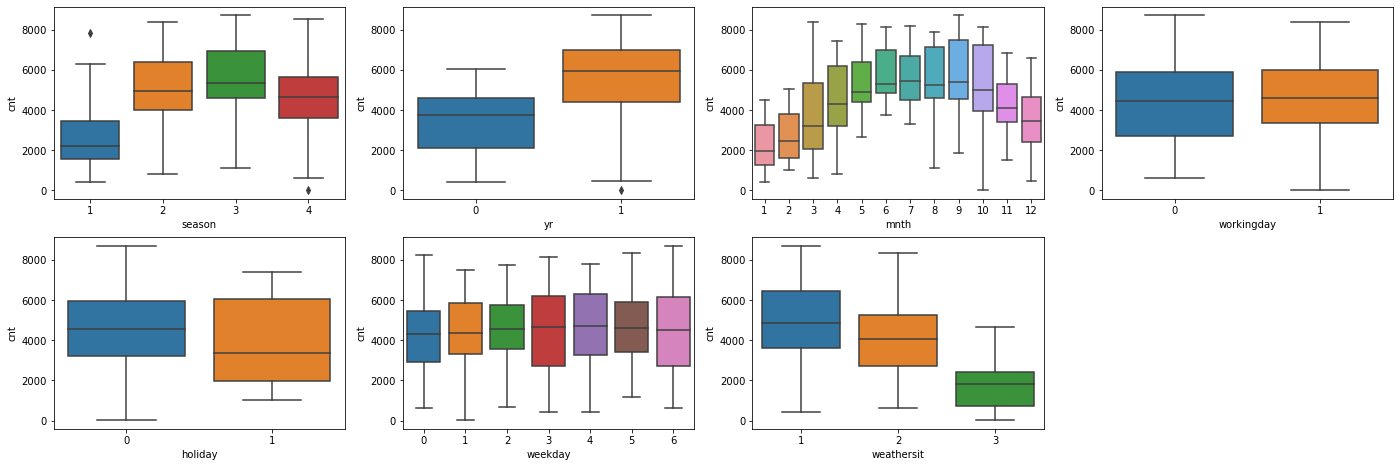

In [10]:
plt.figure(figsize = (24, 12))
plt.subplot(3, 4, 1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3, 4, 2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3, 4, 3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3, 4, 4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3, 4, 5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3, 4, 6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3, 4, 7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

- We can see that most number of bikes were borrowed in the year 2019
- We can see that the median line is higher in workingday rather than on weekends or holidays.
- Most of the users had the least count on the holidays.
- It can be observed that there are 0 values for 4 in weathersit i.e. 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
- we can observe that the rental bikes were less used in the spring season.
- atemp and temp seems to be having high correlation

# Data Preparation

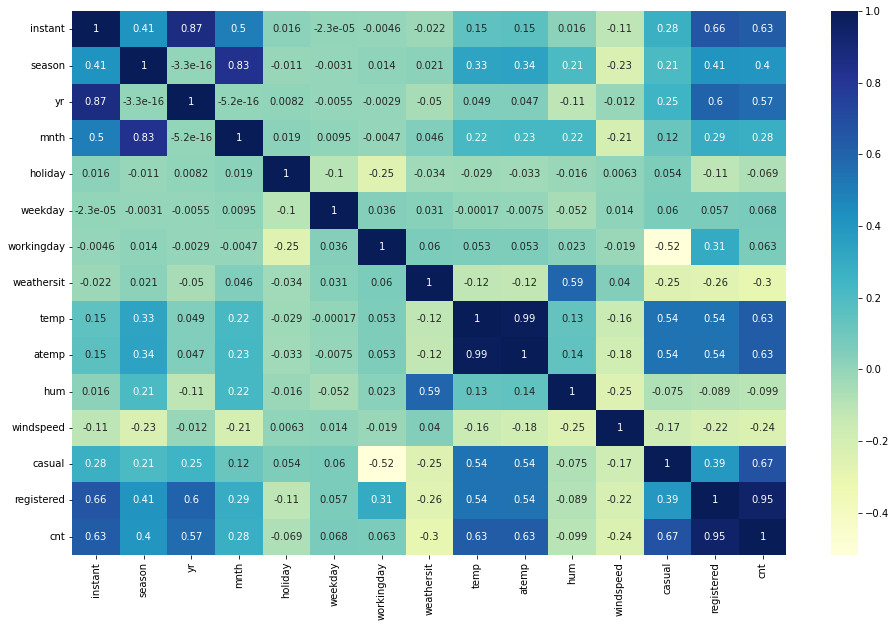

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

- dteday data like column and year is already present in the data so we can drop this column.
- instant in nothing but index so we can drop this column as well.
- cnt column explains both the registered and casual data, hence casual and registered columns can be dropped as well.

In [12]:
bike_df.drop(labels = ['dteday','instant','registered','casual'], axis = 1, inplace = True)

In [13]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

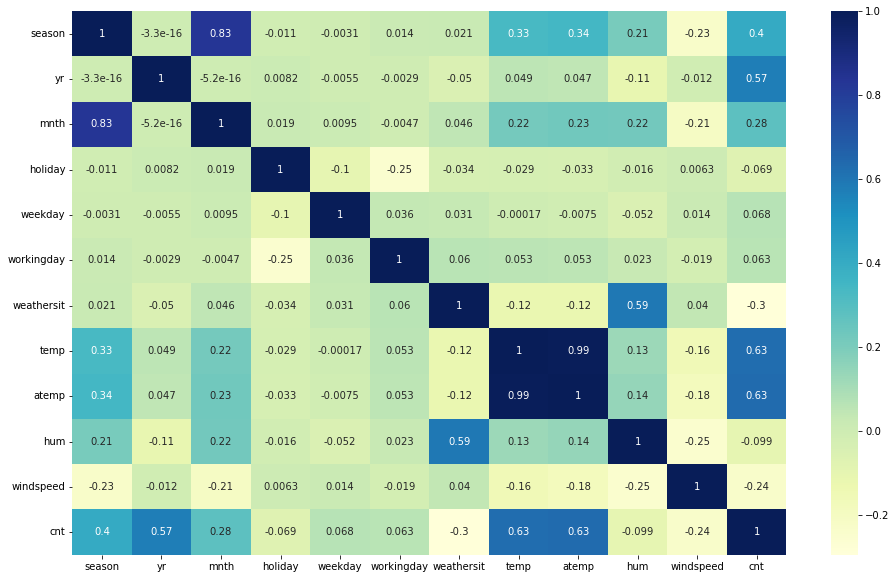

In [14]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Mapping the categorical values so that we can create dummy variables for better results.

In [15]:
bike_df['mnth'] = bike_df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',
                                       11:'Nov',12:'Dec'})

In [16]:
bike_df['season'] = bike_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'}) 

In [17]:
bike_df['weekday'] = bike_df['weekday'].map({0:'Sun',1:'Mon',2:'Tues',3:'Wed',5:'Thurs',6:'Fri',7:'Sat'})

In [18]:
bike_df['weathersit'] = bike_df['weathersit'].map({1:'clear',2:'mist',3:'light snow',4:'rain or fog'})

In [19]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Fri,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     626 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


##### Creating dummy variable dataframe so that later we can merge with the our original dataframe.

In [21]:
mnth = pd.get_dummies(bike_df['mnth'], drop_first = True)
season = pd.get_dummies(bike_df['season'], drop_first = True)
weekday = pd.get_dummies(bike_df['weekday'], drop_first = True)
weathersit = pd.get_dummies(bike_df['weathersit'], drop_first = True)

In [22]:
bike_df = pd.concat([bike_df, mnth], axis = 1)
bike_df = pd.concat([bike_df, season], axis = 1)
bike_df = pd.concat([bike_df, weekday], axis = 1)
bike_df = pd.concat([bike_df, weathersit], axis = 1)

##### Dropping the columns whose dummy variables are already created.

In [23]:
bike_df.drop(labels = ['mnth','season','weekday','weathersit'], axis = 1, inplace = True)

In [24]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,spring,summer,winter,Mon,Sun,Thurs,Tues,Wed,light snow,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,1,0,0,0,0,0,0,1,0,0


In [25]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sept', 'spring', 'summer', 'winter', 'Mon', 'Sun', 'Thurs',
       'Tues', 'Wed', 'light snow', 'mist'],
      dtype='object')

Spiltting the dataset into test and train, keeping 70:30 ratio, can be kept as per need.

In [26]:
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, random_state=100)

In [27]:
print('Test: ',bike_df_test.shape)
print('Train: ',bike_df_train.shape)

Test:  (220, 29)
Train:  (510, 29)


Rescaling the values using MinMax Rescaler, always to be done after splitting.

In [28]:
scaler = MinMaxScaler()
bike_num_vars = ['temp','hum','windspeed','cnt']
bike_df_train[bike_num_vars] = scaler.fit_transform(bike_df_train[bike_num_vars])
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,spring,summer,winter,Mon,Sun,Thurs,Tues,Wed,light snow,mist
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096,0,1,...,1,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,16.0977,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,1,0,0,0,1


In [29]:
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,spring,summer,winter,Mon,Sun,Thurs,Tues,Wed,light snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,23.500287,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.243137,0.247059,0.247059,0.150980,0.143137,0.127451,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,8.090963,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.429398,0.431725,0.431725,0.358381,0.350557,0.333805,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,24.131150,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the Model

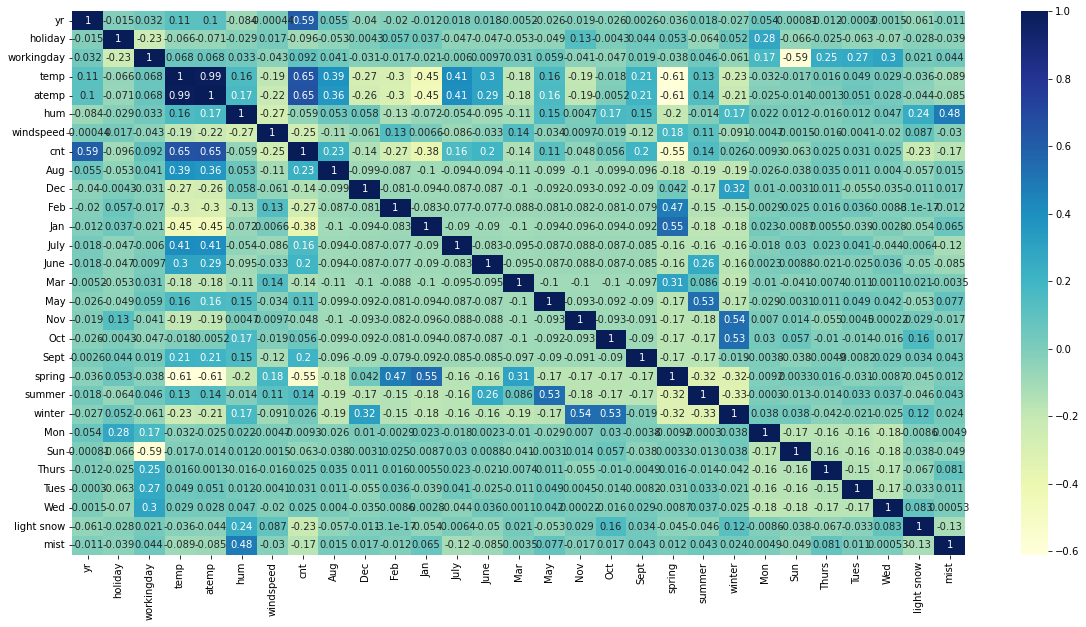

In [30]:
plt.figure(figsize = (20, 10))
sns.heatmap(bike_df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [31]:
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

## Manual Method

### Manual Model - 1

In [32]:
X_train_man = X_train

In [33]:
X_train_man = sm.add_constant(X_train_man)
lr = sm.OLS(y_train, X_train_man)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.81e-180
Time:                        23:24:30   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3323      0.047      7.120      0.000       0.241       0.424
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday       -0.0940      0.030     -3.135      0.002      -0.153      -0.035
workingday    -0.0086      0.015     -0.583      0.560      -0.038       0.020
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0016      0.004      0.426      0.670      -0.006       0.009
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
July          -0.0327      0.035     -0.931      0.352      -0.102       0.036
June           0.0060      0.025      0.241      0.810      -0.043       0.055
Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sept           0.0868      0.032      2.711      0.007       0.024       0.150
spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer         0.0424      0.026      1.617      0.107      -0.009       0.094
winter         0.1071      0.028      3.826      0.000       0.052       0.162
Mon           -0.0119      0.015     -0.785      0.433      -0.042       0.018
Sun           -0.0542      0.015     -3.729      0.000      -0.083      -0.026
Thurs          0.0097      0.016      0.623      0.534      -0.021       0.040
Tues          -0.0087      0.015     -0.564      0.573      -0.039       0.022
Wed            0.0038      0.015      0.261      0.794      -0.025       0.033
light snow    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
mist          -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                         911.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [34]:
vif = pd.DataFrame()
X = X_train_man
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,const,141.44
4,temp,66.90
5,atemp,56.03
19,spring,10.77
21,winter,9.46
20,summer,8.29
16,Nov,6.79
8,Aug,6.47
17,Oct,6.47
11,Jan,5.90


In [35]:
X_train_man = X_train_man.drop('const', axis = 1)

In [36]:
vif = pd.DataFrame()
X = X_train_man
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
4,atemp,476.34
3,temp,435.35
5,hum,38.93
18,spring,12.08
20,winter,11.81
2,workingday,9.42
19,summer,7.40
16,Oct,6.33
15,Nov,6.22
7,Aug,5.74


Drop atemp because of high p-value and high VIF.

In [37]:
X_train_man = X_train_man.drop('atemp', axis = 1)

### Manual Model - 2

In [38]:
X_train_man = sm.add_constant(X_train_man)
lr = sm.OLS(y_train, X_train_man)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.00e-181
Time:                        23:24:30   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3387      0.044      7.657      0.000       0.252       0.426
yr             0.2324      0.008     28.819      0.000       0.217       0.248
holiday       -0.0946      0.030     -3.163      0.002      -0.153      -0.036
workingday    -0.0085      0.015     -0.575      0.565      -0.038       0.021
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug            0.0204      0.034      0.607      0.544      -0.046       0.086
Dec           -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb           -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan           -0.0633      0.034     -1.885      0.060      -0.129       0.003
July          -0.0338      0.035     -0.969      0.333      -0.102       0.035
June           0.0046      0.025      0.186      0.853      -0.044       0.053
Mar            0.0013      0.025      0.052      0.959      -0.047       0.050
May            0.0247      0.021      1.173      0.241      -0.017       0.066
Nov           -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct            0.0075      0.036      0.210      0.834      -0.063       0.078
Sept           0.0859      0.032      2.692      0.007       0.023       0.149
spring        -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer         0.0430      0.026      1.645      0.101      -0.008       0.094
winter         0.1076      0.028      3.853      0.000       0.053       0.163
Mon           -0.0118      0.015     -0.780      0.436      -0.042       0.018
Sun           -0.0542      0.015     -3.732      0.000      -0.083      -0.026
Thurs          0.0091      0.016      0.588      0.557      -0.021       0.040
Tues          -0.0088      0.015     -0.571      0.568      -0.039       0.022
Wed            0.0036      0.015      0.248      0.804      -0.025       0.032
light snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                         38.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X_train_man = X_train_man.drop('const', axis = 1)

In [40]:
vif = pd.DataFrame()
X = X_train_man
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
4,hum,38.12
3,temp,37.21
17,spring,11.65
19,winter,11.60
2,workingday,9.37
18,summer,6.70
15,Oct,6.27
14,Nov,6.09
6,Aug,5.74
9,Jan,5.21


Drop March because of high p-value.

In [41]:
X_train_man = X_train_man.drop('Mar', axis = 1)

### Manual Model - 3

In [42]:
X_train_man = sm.add_constant(X_train_man)
lr = sm.OLS(y_train, X_train_man)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.87e-182
Time:                        23:24:30   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3395      0.041      8.221      0.000       0.258       0.421
yr             0.2324      0.008     28.848      0.000       0.217       0.248
holiday       -0.0946      0.030     -3.166      0.002      -0.153      -0.036
workingday    -0.0085      0.015     -0.574      0.566      -0.037       0.021
temp           0.4450      0.046      9.763      0.000       0.355       0.535
hum           -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed     -0.1861      0.026     -7.245      0.000      -0.237      -0.136
Aug            0.0198      0.032      0.627      0.531      -0.042       0.082
Dec           -0.0454      0.026     -1.748      0.081      -0.096       0.006
Feb           -0.0337      0.022     -1.512      0.131      -0.078       0.010
Jan           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
July          -0.0344      0.033     -1.035      0.301      -0.100       0.031
June           0.0042      0.023      0.179      0.858      -0.042       0.050
May            0.0243      0.020      1.235      0.218      -0.014       0.063
Nov           -0.0409      0.031     -1.329      0.185      -0.101       0.020
Oct            0.0066      0.031      0.215      0.830      -0.054       0.067
Sept           0.0852      0.029      2.945      0.003       0.028       0.142
spring        -0.0443      0.028     -1.563      0.119      -0.100       0.011
summer         0.0427      0.026      1.668      0.096      -0.008       0.093
winter         0.1079      0.027      3.934      0.000       0.054       0.162
Mon           -0.0118      0.015     -0.783      0.434      -0.042       0.018
Sun           -0.0542      0.015     -3.740      0.000      -0.083      -0.026
Thurs          0.0091      0.016      0.587      0.558      -0.021       0.040
Tues          -0.0088      0.015     -0.574      0.566      -0.039       0.021
Wed            0.0036      0.015      0.246      0.806      -0.025       0.032
light snow    -0.2558      0.026     -9.709      0.000      -0.308      -0.204
mist          -0.0596      0.010     -5.716      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_train_man = X_train_man.drop('const', axis = 1)

In [44]:
vif = pd.DataFrame()
X = X_train_man
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
3,temp,37.21
4,hum,36.16
18,winter,10.45
2,workingday,9.28
16,spring,8.05
17,summer,6.69
6,Aug,5.47
5,windspeed,5.03
14,Oct,4.98
10,July,4.96


#### As we see that this is a very long process where we have to analyze both the p-value and as well as the VIF, we need to keep iterating the same process till we find that both of them are low. In order to avoid this long process, we can use another method known as RFE Method.

# RFE Method

#### RFE i.e Recursive Feature Elimination is a better approach to be used when we have large amount of data, it can be done using the mannual approach as well but that would rather take large amount of time since each feature has to be fit in the model and then have to find the VIF and then choose to eliminate. Here this process can be cut short. Choosing to keep 10 variables.

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', False, 19),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 7),
 ('Feb', False, 8),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 16),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 6),
 ('Oct', False, 15),
 ('Sept', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 11),
 ('Sun', False, 4),
 ('Thurs', False, 13),
 ('Tues', False, 12),
 ('Wed', False, 17),
 ('light snow', True, 1),
 ('mist', False, 3)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'July', 'Sept', 'summer',
       'winter', 'light snow'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'spring', 'Mon', 'Sun', 'Thurs', 'Tues', 'Wed', 'mist'],
      dtype='object')

In [49]:
X_train_rfe = X_train[col]

In [50]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.79e-186
Time:                        23:24:31   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.000       0.217       0.319
yr             0.2259      0.008     27.118      0.000       0.210       0.242
holiday       -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp           0.6200      0.023     27.492      0.000       0.576       0.664
hum           -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed     -0.2059      0.026     -7.889      0.000      -0.257      -0.155
July          -0.0482      0.018     -2.606      0.009      -0.085      -0.012
Sept           0.0944      0.016      5.724      0.000       0.062       0.127
summer         0.0800      0.011      7.281      0.000       0.058       0.102
winter         0.1390      0.011     12.903      0.000       0.118       0.160
light snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_train_new = X_train_rfe

### RFE Model - 1

In [52]:
X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.79e-186
Time:                        23:24:31   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.000       0.217       0.319
yr             0.2259      0.008     27.118      0.000       0.210       0.242
holiday       -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp           0.6200      0.023     27.492      0.000       0.576       0.664
hum           -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed     -0.2059      0.026     -7.889      0.000      -0.257      -0.155
July          -0.0482      0.018     -2.606      0.009      -0.085      -0.012
Sept           0.0944      0.016      5.724      0.000       0.062       0.127
summer         0.0800      0.011      7.281      0.000       0.058       0.102
winter         0.1390      0.011     12.903      0.000       0.118       0.160
light snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,const,40.19
3,temp,1.53
6,July,1.43
8,summer,1.33
9,winter,1.28
4,hum,1.26
7,Sept,1.19
5,windspeed,1.16
10,light snow,1.11
1,yr,1.03


#### Dropping off const column because its VIF Value is greater than 10.

In [54]:
X_train_new = X_train_new.drop('const', axis = 1)

In [55]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
7,summer,1.76
8,winter,1.68
5,July,1.55
6,Sept,1.29
9,light snow,1.09
1,holiday,1.04


### RFE Model - 2

While the p-value of the above model are acceptable the VIF of humidity is greater than 10 which is unacceptable, hence needs to be dropped.

In [56]:
X_train_new = X_train_new.drop('hum', axis = 1)

In [57]:
X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.42e-171
Time:                        23:24:31   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0840      0.018      4.794      0.000       0.050       0.118
yr             0.2329      0.009     26.061      0.000       0.215       0.251
holiday       -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp           0.5854      0.024     24.438      0.000       0.538       0.632
windspeed     -0.1459      0.027     -5.365      0.000      -0.199      -0.092
July          -0.0313      0.020     -1.578      0.115      -0.070       0.008
Sept           0.0822      0.018      4.640      0.000       0.047       0.117
summer         0.0750      0.012      6.346      0.000       0.052       0.098
winter         0.1228      0.011     10.731      0.000       0.100       0.145
light snow    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
6,summer,1.75
4,July,1.51
7,winter,1.43
5,Sept,1.28
8,light snow,1.06
1,holiday,1.03


#### The p-Value and VIF Value of this model is acceptable as the p-value lies less than 0.05 and the VIF lies less than 5. Hence this model i.e RFE Model - 2  can be considered as the final model and can be used for the prediciton.

# Residual Analysis of the train data

In [59]:
y_train_cnt = lr_model.predict(X_train_lm)

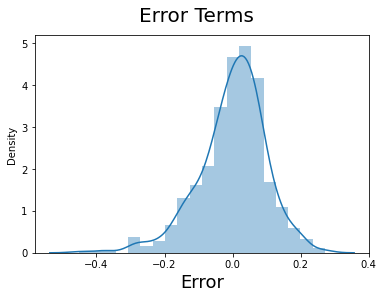

In [60]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Error', fontsize = 18)
plt.show()

The Error Terms seems to be normally distributed. 

# Predictions

Applying scaling to the test dataset.

In [61]:
bike_num_vars = ['temp','hum','windspeed','cnt']
bike_df_test[bike_num_vars] = scaler.transform(bike_df_test[bike_num_vars])
bike_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,spring,summer,winter,Mon,Sun,Thurs,Tues,Wed,light snow,mist
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034,0,0,...,0,1,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,22.85230,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,32.19710,0.314298,0.537414,0.569029,0,0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

Retaining only the columns for which the model has been trained on.

In [63]:
X_test_sm = X_test[X_train_new.columns]

In [64]:
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,July,Sept,summer,winter,light snow
184,1.0,0,1,0.831783,0.084219,1,0,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,1,0,0
299,1.0,0,0,0.511964,0.334206,0,0,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,1,0,0


In [65]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'July', 'Sept', 'summer',
       'winter', 'light snow'],
      dtype='object')

In [66]:
y_pred = lr_model.predict(X_test_sm)

In [67]:
r2_score(y_test,y_pred)

0.7717629996668943

#### 0.77 of r2 value means that the the predictors are able to explain 77% of the varaiation in the data.

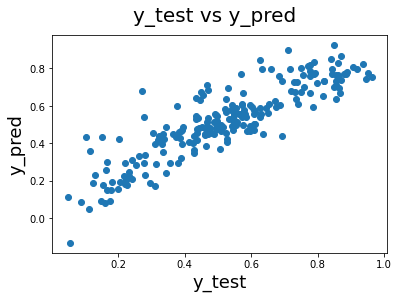

In [68]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 18)
plt.show()

### Model Interpretation and Explanation

In [69]:
lr_model.params

const         0.084001
yr            0.232940
holiday      -0.087535
temp          0.585357
windspeed    -0.145946
July         -0.031296
Sept          0.082172
summer        0.075026
winter        0.122827
light snow   -0.252410
dtype: float64

- Temperature seems to be having major effect in the bike renatl, since its coefficient is the highest of all.
- More bikes are rented in the month of september
- Windspeed has significant effect on the bike rentals where as it reduces the rental count. That could mean that bikes are less likely to be rented when there is high windspeed.
- People are more likely to borrow bikes on winter than in summer.

#### The final conclusion from the model can be drawn that Bike Rentals are effected by the Temperature, Seasons and by the Month. Where people would rent their bike more on winter than on the summer in order to avoid the sun in summer. And so on.